<h1><center>HW2 Convolutional neural networks for text classification
</center></h1>

In this homework you will learn how to build a simple convolutional neural networks (1 convolution layer with max pooling + 1 activation layer) from scratch, and use the model to solve text classification problem. As optional, you also have a chance to build real life CNN models using Keras + Tensorflow and use it to challenge the model you build from scratch. 
    

<h3> 1. Math preliminaries </h3>

Please answer all these questions:

1. What is the form of sigmoid function $σ(z)$ ? Show that $σ′(z) = σ(z)[1 − σ(z)]$.
<br/>

**Solution:**
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
$$\sigma(z)^\prime = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}}(\frac{e^{-z}}{1+e^{-z}}) = \sigma(x)(1-\sigma(z))$$

2. Another popular activation function is $tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}$ , show that $tanh′(z) = 1 − tanh(z)^2$.
<br/>

**Solution:**
$$\tanh(z)^\prime = \frac{(e^z + e^{-z})^2 - (e^z - e^{-z})^2}{(e^z + e^{-z})^2} = 1 - \frac{(e^z - e^{-z})^2}{(e^z + e^{-z})^2} = 1 - tanh(z)^2$$

3. For a single variable single layer perceptron with sigmoid activation function (equivalent
to LR) and loss function defined as:
<center>$\hat{y}_i = σ ( w_1 x_i + w_0 )$ </center>
<center>$L(w_0, w_1) = \sum_i y_i lg(\hat{y}_i)+(1−y_i)lg(1−\hat{y}_i)$ </center>
Show that:
<center>$\frac{∂L}{∂w_1} =\sum_i(y_i−\hat{y}_i)x_i$ </center>
<center>$\frac{∂L}{∂w_0} =\sum_i(y−\hat{y}_i)$  </center>
<br/>

**Solution:**  
Let\`s add a dummy dimension to $x$ so that we can write the mapping from $x$ to $\hat{y}$ as $\hat{y_i} = \sigma(x^T_iw)$.  
$$\frac{\partial \hat{y_i}}{\partial w} = \hat{y_i}(1 - \hat{y_i})x_i = [\hat{y_i}(1 - \hat{y_i})x_i, \quad \hat{y_i}(1-\hat{y_i})]^T$$
Then  
$$\frac{\partial L(w)}{\partial w} = \frac{\partial L(w)}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w} = \sum_i (\frac{y_i}{\hat{y_i}} - \frac{(1 - y_i)}{(1 - \hat{y_i})})\frac{\partial \hat{y_i}}{\partial w} = \sum_i \frac{(y_i - \hat{y_i})}{\hat{y_i}(1 - \hat{y_i})} \frac{\partial \hat{y_i}}{\partial w} = [\sum_i (y_i - \hat{y_i})x_i,\quad \sum_i (y_i - \hat{y_i})]^T$$


4. For column vectors $\vec{x}$ and $\vec{w}$ , and a symmetric matrix $\overleftrightarrow{M}$, define the gradient operator:
<center> $∇_\vec{x} = (\frac{∂}{∂x_0}, \frac{∂}{∂x_1}, ...,\frac{∂}{∂x_n})^T$ </center>
show that:
<center> $∇_x(\vec{w}^T\vec{x}) = \vec{w}$ </center>
<center> $∇_x(\vec{x}^T\vec{w}) = \vec{w}$ </center>
<center> $∇_x(\vec{w}^T\overleftrightarrow{M}\vec{x}) = \overleftrightarrow{M}\vec{w}$ </center>
<br/>

**Solution:**  
$$∇_x(\vec{w}^T\vec{x}) = ∇_x(\sum_i x_i w_i) = [w_0,...,w_n]^T = \vec{w}$$  

$$∇_x(\vec{x}^T\vec{w}) = ∇_x(\sum_i x_i w_i) = [w_0,...,w_n]^T = \vec{w}$$

$$∇_x(\vec{w}^T\overleftrightarrow{M}\vec{x}) = ∇_x(\sum_i w^T m_i x_i) = [w^Tm_1,...,w^Tm_n]^T = (w^TM)^T = \overleftrightarrow{M}\vec{w}$$
where $M = [m0,...m_n]$, i.e. $m_i$ is the columns vector of $M$.

5. Let’s expand Q3 to a more general case. Suppose there is a single layer perceptron with multiple variables:
<center> $\hat{y}_i = σ( \vec{w}^T \vec{x_i} )$ </center>
<center>$L(\vec{w}) = \sum_i y_i lg(\hat{y}_i)+(1−y_i)lg(1−\hat{y}_i)$ </center>
show that:
<center> $∇_\vec{w}L(\vec{w}) = \sum_i(y_i - \hat{y}_i)\vec{x_i}$ </center>
(hint: use the notation defined in Q4)
<br/>
<br/>

**Solution:**  
Showed in Q3

6. In a CNN illustrated as Fig 1, suppose the loss function is:
<center> $L(\overleftrightarrow{U}, \vec{w}) = \sum_i y_i lg(\hat{y}_i)+(1−y_i)lg(1−\hat{y}_i)$ </center>
From the conclusion in Q5, we can get that:
<center> $∇_w L(\overleftrightarrow{U}, \vec{w}) = \sum_i (y_i -\hat{y}_i)\vec{h}^{(i)}$ </center>
Can you calculate $∇_{u_i} L(U,w)$ using similar techniques?

<img src="CNN.png" style="width:700px">

**Solution:**  
*Change $u_i$ to $u_j$ for clearer reference(i: sample index, j: filter index), otherwise quite confusion...*  
Define cost function $l$ such that $L(U, w) = \sum_i l(y_i, \hat{y_i})$. Then we have
$$∇_{u_j} L(\overleftrightarrow{U}, \vec{w}) = \sum_i \frac{\partial l}{\partial h_j} \frac{\partial h_j}{\partial u_j} = \sum_i (y_i - \hat{y_i})w_j(1 - h_j^2)x_m$$
where $m = \arg\max_{p} u_j x_p \forall p \in [1, n-k+1]$.  
More generally, we have:
$$∇_u L(\overleftrightarrow{U}, \vec{w}) = \sum_i (y_i - \hat{y_i})w \otimes (\mathbf{1} - h\otimes h)\otimes X$$
where $\otimes$ is elementwise multiplication.

<h3> 2. Coding exercise </h3>

Follow the instruction in the notebook, and implement the missing code to build the CNN classifier from scratch. Note that the training might be very slow. Consider reducing the training data size and vocabulary size for testing your code. Ask questions in Piazza/Wechat if you get blocked.

Hint: In this CNN, words should be one-hot encoded, but we actually numerically encoded it in the code. This is a sparse trick we did to boost the efficiency, try to understand how it works.

Some of the key details you will have a chance to implement:
- Forward propagation of a CNN network
- Backward propagation of a CNN network
- Numerical gradient checking 
- Use Keras and TensorFlow to implement more complex CNN networks
    
You are given the following files:
- `hw02.ipynb`: Notebook file with starter code
- `train.txt`: Training set to train your model
- `test.txt`: Test set to report your model’s performance
- `sample_prediction.csv`: Sample file your prediction result should look like
- `utils/`: folder containing all utility code for the series of homeworks

<h3> 3. Deliverables (zip them all) </h3>

- pdf version of your final notebook.
- Use the best model you trained, generate the prediction for test.txt, name the
output file prediction.csv (Be careful: the best model in your training set might not
be the best model for the test set).
- After you finished the run, does the model perform better than the bag of words
model you built last week? What do you think that contributes to the difference in
performance?
- HW2_writeup.pdf: summarize the method you used and report their performance.
If you worked on the optional task, add the discussion. Add a short essay
discussing the biggest challenges you encounter during this assignment and
what you have learnt.

(**You are encouraged to add the writeup doc into your notebook
using markdown/html langauge, just like how this notes is prepared**)

# =============== Coding Starts Here ===================

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# add utils folder to path
p = os.path.dirname(os.getcwd())
if p not in sys.path:
    sys.path = [p] + sys.path

from utils.hw2 import load_data, save_prediction, read_vocab
from utils.general import sigmoid, tanh, show_keras_model

# CNN model 
Complete the code block in the cells in this section.

* step1: Implement the pipeline method to process the raw input
* step2: Implement the forward method
* step3: Implement the backward method
* step4: Run the cell below to train your model

In [2]:
import numpy as np

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
def preprocess_text(text: str, lmtzr=None, verbose=False):
    """Preprocess text data: remove symbols, stop words, and apply tokenization and lemmatization"""
    if verbose:
        print('='*80)
        print('Preprocess Text Data')
    text = text.strip()
    
    # remove symbols
    text = re.sub("[^A-Za-z0-9' ]+", ' ', text.lower().strip())
    
    # tokenization
    if verbose:
        print('_'*80)
        print('Tokenization')
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print('downloading tokenizers/punkt.zig from nltk')
        nltk.download('punkt')
    text = word_tokenize(text)

    # remove stopwords
    if verbose:
        print('_' * 80)
        print('Remove stopwords')
    try:
        nltk.data.find('corpora/stopwords.zip')
    except LookupError:
        print('downloading corpora/stopwords.zig from nltk')
        nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]

    # lemmatization
    if verbose:
        print('_' * 80)
        print('Lemmatization')
    if not lmtzr:
        try:
            nltk.data.find('corpora/wordnet.zip')
        except LookupError:
            print('downloading corpora/wordnet.zig from nltk')
            nltk.download('wordnet')
        lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    return text

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [6]:
def sigmoid(x: np.ndarray):
    '''sigmoid for np.ndarray'''
    return 1/(1+np.exp(-x))

In [7]:
from scipy.sparse import hstack, vstack
from scipy.signal import correlate

In [8]:
from time import time

In [9]:
def logistic_loss(y, yhat):
    return (-y*np.log(yhat) - (1-y)*np.log(1-yhat)).mean()

In [10]:
import pdb

In [11]:
from tqdm import tqdm

In [12]:
class CNNTextClassificationModel:
    def __init__(self, vocab, sentence_length=10, window_size=2, F=100, alpha=0.05, random_state=0):
        """
        F: number of filters
        alpha: back propagatoin learning rate
        """
        
        assert sentence_length >= window_size, "Sentence size cannot be shorter than the window size"
        self.vocab = vocab
        self.vectorizer = CountVectorizer(binary=True)
        self.vectorizer.fit(self.vocab)
        self.vocab_size = len(self.vectorizer.vocabulary_)
        self.sentence_length = sentence_length
        self.window_size = window_size
        self.filter_size = len(vocab) * window_size
        self.F = F
        self.alpha = alpha
        self.random_state = random_state
        np.random.seed(seed=random_state)
        
        # U and w are the weights of the hidden layer, see Fig 1 in the pdf file
        # U is the weight matrix of the 1D convolutional layer with shape: voc_size * window_size by num_filter
        self.U = np.random.normal(loc=0, scale=0.01, size=(F, self.window_size, self.vocab_size))
        # w is the weights of the activation layer (after max pooling)
        self.w = np.random.normal(loc=0, scale=0.01, size=(F + 1))
        
    def pipeline(self, X, padding=True):
        """
        Data processing pipeline to:
        1. Tokenize, Normalize the raw input
        2. Translate raw data input into numerical encoded vectors with one-hot encoding
        
        :param X: raw data input
        :param padding: whether to use padding or chopping the input sentence to the given length; if False, use bag-of-words, i.e. add one-hot encoding of all words together
        :return: sparse matrix
        """
        X2 = [preprocess_text(x) for x in X]
        
        if padding:
            X2 = [x[:self.sentence_length] + ['']*(self.sentence_length - len(x)) for x in X2]
            # apply one-hot encoding and concatenate all words of a sentence
            X2 = [hstack([self.vectorizer.transform([y]) for y in x]) for x in X2]
        else:
            # bag of words
            X2 = [self.vectorizer.transform([' '.join(x)]) for x in X2]

        return vstack(X2)
          
    def train(self, X_train, y_train, X_dev, y_dev, nEpoch=50, batch_size=30, raw_text=True):
        """
        Function to fit the model
        :param X_train, X_dev: raw data input
        :param y_train, y_dev: label 
        :nEpoch: number of training epoches
        """
        train_score = []
        
        if raw_text:
            X_train = self.pipeline(X_train).A
            X_train.reshape(len(X_train), self.sentence_length, self.vocab_size)
            X_dev = self.pipeline(X_dev)
            X_dev.reshape(len(X_dev), self.sentence_length, self.vocab_size)
        else:
            X_train = X_train.A.reshape(X_train.get_shape()[0], self.sentence_length, self.vocab_size)
            X_dev = X_dev.A.reshape(X_dev.get_shape()[0], self.sentence_length, self.vocab_size)
        
        n_batch = len(X_train)//batch_size
        kf = KFold(n_batch, shuffle=True, random_state=self.random_state)
        
        for epoch in range(nEpoch):
            print(f'{"="*40} Epoch: {epoch+1} START {"="*40}\n')
            t1 = time()
            for i, idx in enumerate(tqdm(kf.split(X_train))):
                
                t3 = time()
                self.fit(X_train[idx[1], :], y_train[idx[1]])
                t4 = time()
                if i % 100 == 0:
                    print(f'{"*"*20} training batch{i}/{n_batch},\tbatch shape: {X_train[idx[1], :].shape}\t\ttraining time: {t4-t3:.3f}seconds {"*"*20}')
            t2 = time()
            
            prob_train = self.predict(X_train, return_prob=True)
            t5 = time()
            prob_dev = self.predict(X_dev, return_prob=True)
            t6 = time()
            accuracy_train = accuracy_score(y_train, np.where(prob_train>0.5, 1, 0))
            accuracy_dev = accuracy_score(y_dev, np.where(prob_dev>0.5, 1, 0))
            loss_train = logistic_loss(y_train, prob_train)
            loss_dev = logistic_loss(y_dev, prob_dev)
            
            train_score.append((accuracy_train, accuracy_dev, loss_train, loss_dev))
            
            print(f'\tTrain accuracy: {accuracy_train:.6f}\tDev accuracy: {accuracy_dev:.6f}\n\tTrain loss: {loss_train:.6f}\tDev loss: {loss_dev:.6f}\n\ttraining time: {t2-t1: .3f}seconds\tpredict train set time: {t5-t2: .3f}seconds\tpredict dev set time: {t6-t5: .3f}seconds\n{"="*40} Epoch: {epoch+1} END {"="*40}\n')
            
        return train_score
        
    def fit(self, Xd, y):
        """
        :param Xd: encoded words, dense matrix
        :param y: target
        """
        
        self.backward(Xd, y)
        return self
        
    def predict(self, Xd, return_prob=False):
        """
        :param Xd: encoded words, dense matrix
        """
        
        prob = self.forward(Xd)["yhat"]
        if return_prob:
            return prob
        else:
            return np.where(prob>0.5, 1, 0)
    
    def forward(self, Xd):
        """
        :param Xd: encoded words, dense matrix
        :return: a result dictionary containing 3 items -
        result['yhat']: \hat y in Fig 1.
        result['h']: the hidden layer output after max pooling, h = [h1, ..., hf,1]
        result['hid']: argmax of F filters, e.g. j of x_j
        e.g. for the ith filter u_i, tanh(word[hid[j], hid[j] + window_size]*u_i) = h_i
        """
        h = []
        hid = []
#         pdb.set_trace()
        # layer 1. compute h and 
        t1 = time()
        for j in range(self.F):
            # TODO: apply some trice to speed up...
            conv = correlate(Xd, self.U[j][None, :, :], mode='valid')
            # apply activation                                                                                                                                                                                                                                                                                                                                        
            hid.append(conv.argmax(axis=1))
            h.append(np.tanh(conv.max(axis=1)))
        t2 = time()
#         print(f'{self.F} filters, compute convolution, {t2 - t1:.5f} seconds, {(t2-t1)/self.F:.5f} seconds per filter')
        
        h = np.hstack(h)
        hid = np.hstack(hid)
        # layer 2. compute probability
        h = np.hstack([h, np.ones((len(h), 1))])  # add bias term
        yhat = sigmoid(h.dot(self.w))
    
        return {"yhat": yhat, "h": h, "hid": hid}
    
    def backward(self, Xd, y):
        """
        Update the U, w using backward propagation
        
        :param Xd: encoded words, dense matrix
        :param label: int 0 or 1
        :return: None
        
        update weight matrix/vector U and V based on the loss function
        """
        res = self.forward(Xd)
        yhat = res["yhat"]
        h = res["h"]
        hid = res["hid"]

        # update U and w here
        """
        Implement your code here
        """
        dw = self._calc_gradient_w(y, res['yhat'], res['h'])
        du = self._calc_gradient_U(Xd, y, res['yhat'], res['h'], res['hid'])
        self.w += self.alpha * dw
        self.U += self.alpha * du

    def _calc_gradient_w(self, y, yhat, h):
        return (h*(y - yhat)[:, None]).mean(axis=0)
    
    def _calc_gradient_U(self, Xd, y, yhat, h, hid):
#         pdb.set_trace()
        t1 = time()
        a = (((1 - h**2)*(y*(y - yhat))[:, None])[:, :-1]*self.w[None, :-1]).T[:, :, None, None]
        t2 = time()
        # too slow....
        argmax_indices = self._get_argmax_indices(hid)
        b = Xd[np.arange(len(y))[:, None], argmax_indices]
        t3 = time()
#         print(f'compute gradient U, a: {t2 - t1:.5f} seconds, b: {t3 - t2: .5f} seconds')
        du = (a*b).mean(axis=1)
        return du
    
    def _get_argmax_indices(self, hid):
        s, f = hid.shape
        indices = []
        for j in range(f):
            by_filter = []
            for i in range(s):
                by_filter.append(np.r_[np.s_[hid[i, j]:hid[i, j]+self.window_size]])
            indices.append(np.array(by_filter))
        return np.array(indices)

In [15]:
X, y = data.text, data.target
X_train, X_dev, y_train, y_dev = train_test_split(X[:2000], y[:2000], test_size=0.3)

In [24]:
cls = CNNTextClassificationModel(vocab, sentence_length=30, window_size=5, F=15, alpha=0.01, random_state=0)

In [25]:
X_train = cls.pipeline(X_train)

In [26]:
X_dev = cls.pipeline(X_dev)

In [27]:
# batch_size = 1: SGD
train_score = cls.train(X_train, y_train, X_dev, y_dev, nEpoch=10, raw_text=False, batch_size=1)

0it [00:00, ?it/s]

======================================== Epoch: 1 START ========================================



1it [00:00,  1.74it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.570seconds ********************


101it [00:40,  2.52it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.386seconds ********************


201it [01:20,  2.10it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.494seconds ********************


301it [02:01,  2.63it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.374seconds ********************


401it [02:40,  2.59it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.377seconds ********************


501it [03:19,  2.58it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.381seconds ********************


601it [03:59,  2.61it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.380seconds ********************


701it [04:38,  2.54it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.393seconds ********************


801it [05:18,  2.66it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.374seconds ********************


901it [05:55,  2.75it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.367seconds ********************


1001it [06:32,  2.72it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.365seconds ********************


1101it [07:10,  2.66it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.403seconds ********************


1201it [07:47,  2.71it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.363seconds ********************


1301it [08:24,  2.63it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.366seconds ********************


1400it [09:01,  2.59it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.519286	Dev accuracy: 0.486667
	Train loss: 0.692991	Dev loss: 0.693227
	training time:  541.438seconds	predict train set time:  864.363seconds	predict dev set time:  232.431seconds
======================================== Epoch: 1 END ========================================

======================================== Epoch: 2 START ========================================



1it [00:00,  2.14it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.457seconds ********************


101it [00:37,  2.74it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.366seconds ********************


201it [01:13,  2.68it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.399seconds ********************


301it [01:50,  2.77it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.357seconds ********************


401it [02:27,  2.73it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.373seconds ********************


501it [03:06,  2.68it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.363seconds ********************


601it [03:44,  2.73it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.364seconds ********************


701it [04:21,  2.72it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.364seconds ********************


801it [04:58,  2.75it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.363seconds ********************


901it [05:35,  2.72it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.360seconds ********************


1001it [06:12,  2.74it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.360seconds ********************


1101it [06:50,  2.12it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.495seconds ********************


1201it [07:47,  1.83it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.515seconds ********************


1301it [08:41,  1.84it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.502seconds ********************


1400it [09:33,  2.44it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.519286	Dev accuracy: 0.486667
	Train loss: 0.692936	Dev loss: 0.693239
	training time:  573.478seconds	predict train set time:  732.580seconds	predict dev set time:  224.843seconds
======================================== Epoch: 2 END ========================================

======================================== Epoch: 3 START ========================================



1it [00:00,  2.29it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.433seconds ********************


101it [00:35,  2.89it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.348seconds ********************


201it [01:10,  2.89it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


301it [01:45,  2.58it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.444seconds ********************


401it [02:20,  2.88it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


501it [02:55,  2.88it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


601it [03:30,  2.84it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.359seconds ********************


701it [04:05,  2.87it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


801it [04:40,  2.89it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


901it [05:16,  2.64it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1001it [05:51,  2.86it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1101it [06:26,  2.87it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


1201it [07:01,  2.86it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1301it [07:37,  2.89it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


1400it [08:12,  2.84it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.519286	Dev accuracy: 0.486667
	Train loss: 0.692870	Dev loss: 0.693236
	training time:  492.402seconds	predict train set time:  668.579seconds	predict dev set time:  222.236seconds
======================================== Epoch: 3 END ========================================

======================================== Epoch: 4 START ========================================



1it [00:00,  2.62it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.377seconds ********************


101it [00:35,  2.88it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


201it [01:10,  2.84it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


301it [01:45,  2.89it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.341seconds ********************


401it [02:20,  2.89it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


501it [02:55,  2.86it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


601it [03:30,  2.89it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


701it [04:05,  2.90it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.341seconds ********************


801it [04:40,  2.70it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


901it [05:15,  2.88it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1001it [05:50,  2.87it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.353seconds ********************


1101it [06:25,  2.87it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1201it [07:00,  2.88it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1301it [07:35,  2.89it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1400it [08:10,  2.85it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.519286	Dev accuracy: 0.486667
	Train loss: 0.692750	Dev loss: 0.693224
	training time:  490.481seconds	predict train set time:  669.483seconds	predict dev set time:  222.252seconds
======================================== Epoch: 4 END ========================================

======================================== Epoch: 5 START ========================================



1it [00:00,  2.67it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.371seconds ********************


101it [00:35,  2.84it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.364seconds ********************


201it [01:10,  2.77it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.369seconds ********************


301it [01:45,  2.89it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


401it [02:20,  2.79it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.371seconds ********************


501it [02:55,  2.89it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


601it [03:30,  2.87it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


701it [04:05,  2.80it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


801it [04:40,  2.80it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


901it [05:15,  2.89it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1001it [05:50,  2.83it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1101it [06:25,  2.89it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


1201it [07:00,  2.88it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


1301it [07:35,  2.84it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


1400it [08:10,  2.85it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.534286	Dev accuracy: 0.495000
	Train loss: 0.692527	Dev loss: 0.693170
	training time:  490.769seconds	predict train set time:  667.290seconds	predict dev set time:  223.659seconds
======================================== Epoch: 5 END ========================================

======================================== Epoch: 6 START ========================================



1it [00:00,  2.66it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.373seconds ********************


101it [00:35,  2.88it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


201it [01:10,  2.88it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.341seconds ********************


301it [01:45,  2.82it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


401it [02:20,  2.90it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


501it [02:54,  2.86it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


601it [03:29,  2.82it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


701it [04:04,  2.89it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


801it [04:40,  2.86it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


901it [05:15,  2.78it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.360seconds ********************


1001it [05:50,  2.89it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1101it [06:25,  2.89it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1201it [07:00,  2.86it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1301it [07:35,  2.85it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.353seconds ********************


1400it [08:10,  2.85it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.577857	Dev accuracy: 0.505000
	Train loss: 0.692115	Dev loss: 0.693041
	training time:  490.772seconds	predict train set time:  667.538seconds	predict dev set time:  221.365seconds
======================================== Epoch: 6 END ========================================

======================================== Epoch: 7 START ========================================



1it [00:00,  2.67it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.371seconds ********************


101it [00:35,  2.85it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.340seconds ********************


201it [01:09,  2.89it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


301it [01:44,  2.85it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


401it [02:19,  2.38it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.474seconds ********************


501it [02:54,  2.89it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


601it [03:29,  2.85it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.348seconds ********************


701it [04:04,  2.89it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


801it [04:39,  2.82it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


901it [05:14,  2.87it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


1001it [05:50,  2.84it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.362seconds ********************


1101it [06:26,  2.88it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1201it [07:01,  2.87it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1301it [07:36,  2.88it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.347seconds ********************


1400it [08:10,  2.85it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.560000	Dev accuracy: 0.506667
	Train loss: 0.691483	Dev loss: 0.692854
	training time:  490.861seconds	predict train set time:  668.038seconds	predict dev set time:  222.221seconds
======================================== Epoch: 7 END ========================================

======================================== Epoch: 8 START ========================================



1it [00:00,  2.65it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.374seconds ********************


101it [00:35,  2.89it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


201it [01:10,  2.83it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


301it [01:45,  2.90it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


401it [02:20,  2.90it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


501it [02:55,  2.88it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


601it [03:30,  2.89it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


701it [04:05,  2.87it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


801it [04:40,  2.85it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


901it [05:15,  2.87it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1001it [05:51,  2.77it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.352seconds ********************


1101it [06:26,  2.88it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.348seconds ********************


1201it [07:01,  2.88it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.351seconds ********************


1301it [07:36,  2.80it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1400it [08:11,  2.85it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.505000	Dev accuracy: 0.503333
	Train loss: 0.690828	Dev loss: 0.692739
	training time:  491.952seconds	predict train set time:  673.914seconds	predict dev set time:  222.257seconds
======================================== Epoch: 8 END ========================================

======================================== Epoch: 9 START ========================================



1it [00:00,  2.66it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.374seconds ********************


101it [00:35,  2.90it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


201it [01:10,  2.88it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


301it [01:44,  2.90it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


401it [02:19,  2.89it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


501it [02:55,  2.88it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


601it [03:30,  2.80it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.352seconds ********************


701it [04:04,  2.89it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


801it [04:40,  2.88it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


901it [05:15,  2.89it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


1001it [05:50,  2.79it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.387seconds ********************


1101it [06:25,  2.80it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1201it [07:01,  2.85it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1301it [07:36,  2.84it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1400it [08:10,  2.85it/s]
0it [00:00, ?it/s]

	Train accuracy: 0.497857	Dev accuracy: 0.500000
	Train loss: 0.690376	Dev loss: 0.692802
	training time:  490.774seconds	predict train set time:  668.622seconds	predict dev set time:  223.312seconds
======================================== Epoch: 9 END ========================================

======================================== Epoch: 10 START ========================================



1it [00:00,  2.68it/s]

******************** training batch0/1400,	batch shape: (1, 30, 9766)		training time: 0.370seconds ********************


101it [00:35,  2.86it/s]

******************** training batch100/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


201it [01:10,  2.88it/s]

******************** training batch200/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


301it [01:45,  2.85it/s]

******************** training batch300/1400,	batch shape: (1, 30, 9766)		training time: 0.343seconds ********************


401it [02:19,  2.88it/s]

******************** training batch400/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


501it [02:54,  2.88it/s]

******************** training batch500/1400,	batch shape: (1, 30, 9766)		training time: 0.342seconds ********************


601it [03:30,  2.89it/s]

******************** training batch600/1400,	batch shape: (1, 30, 9766)		training time: 0.338seconds ********************


701it [04:04,  2.92it/s]

******************** training batch700/1400,	batch shape: (1, 30, 9766)		training time: 0.340seconds ********************


801it [04:39,  2.89it/s]

******************** training batch800/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


901it [05:14,  2.84it/s]

******************** training batch900/1400,	batch shape: (1, 30, 9766)		training time: 0.352seconds ********************


1001it [05:49,  2.88it/s]

******************** training batch1000/1400,	batch shape: (1, 30, 9766)		training time: 0.346seconds ********************


1101it [06:24,  2.89it/s]

******************** training batch1100/1400,	batch shape: (1, 30, 9766)		training time: 0.345seconds ********************


1201it [07:00,  2.85it/s]

******************** training batch1200/1400,	batch shape: (1, 30, 9766)		training time: 0.344seconds ********************


1301it [07:35,  2.85it/s]

******************** training batch1300/1400,	batch shape: (1, 30, 9766)		training time: 0.359seconds ********************


1400it [08:09,  2.86it/s]


	Train accuracy: 0.498571	Dev accuracy: 0.501667
	Train loss: 0.690234	Dev loss: 0.693037
	training time:  489.924seconds	predict train set time:  679.313seconds	predict dev set time:  221.253seconds
======================================== Epoch: 10 END ========================================



In [30]:
train_score = pd.DataFrame(train_score, columns=['train_acc', 'val_acc', 'train_loss', 'val_loss'])

In [34]:
import matplotlib.pyplot as plt

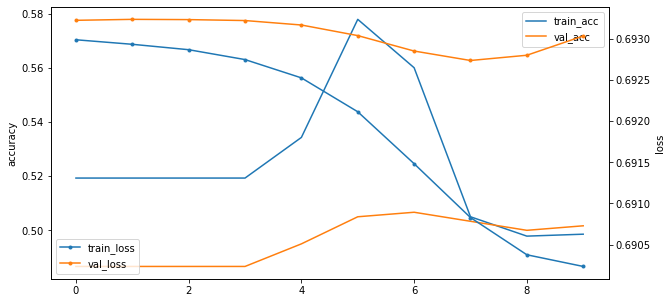

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = train_score.iloc[:, :2].plot(ax=ax)
ax2 = ax.twinx()
_ = train_score.iloc[:, 2:].plot(ax=ax2, style='.-')
_ = ax.set_ylabel('accuracy')
_ = ax2.set_ylabel('loss')

In [42]:
cls

In [43]:
test_data = load_data("test.txt")

In [47]:
X_test = test_data.text

In [50]:
X_test = cls.pipeline(X_test)

In [61]:
pred = cls.predict(X_test.A.reshape(X_test.get_shape()[0], cls.sentence_length, cls.vocab_size))

In [64]:
pred = np.where(pred, 'pos', 'neg')

In [67]:
pd.Series(pred).to_csv('prediction.csv', header=False)

In [ ]:
"""
This cell shows you how the model will be used, you have to finish the cell below before you
can run this cell. 

Once the implementation is done, you should hype tune the parameters to find the best config

Note I only selected 2000 data points to speed up debugging, you should use all the data to train the 
final model
"""
from sklearn.model_selection import train_test_split
data = load_data("train.txt")
vocab = read_vocab("vocab.txt")
# X, y = data.text, data.target
# X_train, X_dev, y_train, y_dev = train_test_split(X[:2000], y[:2000], test_size=0.3)
# cls = CNNTextClassificationModel(vocab)
# cls.train(X_train, y_train, X_dev, y_dev, nEpoch=10)

# Optional: Build your model using Keras + Tensorflow

So far we have always forced you to implement things from scratch. You may feel it's overwhelming, but fortunately, it is not how the real world works. In the real world, there are existing tools you can leverage, so you can focus on the most innovative part of your work. We asked you to do all the previous execises for learning purpose, and since you have already reached so far, it's time to unleash yourself and allow you the access to the real world toolings.

## Sample model 

In [3]:
# First let's see how you can build a similar CNN model you just had using Keras
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

MAX_LENGTH = 100

In [4]:
# Yes! it is a good practice to do data processing outside the ML model
wnet = WordNetLemmatizer()
# Numerical encode all the words
unknown = vocab['__unknown__']
X_train2 = [[vocab.get(wnet.lemmatize(w), unknown) for w in word_tokenize(sent)] for sent in X_train]
X_dev2 = [[vocab.get(wnet.lemmatize(w), unknown)for w in word_tokenize(sent)] for sent in X_dev]

# Tensorflow does not handle variable length input well, let's unify all input to the same length
def trim_X(X, max_length=100, default=vocab['.']):
    for i in range(len(X)):
        if len(X[i]) > max_length:
            X[i] = X[i][:max_length]
        elif len(X[i]) < max_length:
            X[i] = X[i] + [default] * (max_length - len(X[i]))
            
    return np.array(X)
            
X_train2 = trim_X(X_train2, MAX_LENGTH)
X_dev2 = trim_X(X_dev2, MAX_LENGTH)


# Now we have all the input data nicely encoded with numerical label, and each of the input data are trimmed 
# to have the same length. We would have needed to further apply one-hot encode for each word. However, this 
# would be very expensive, since each word will be expanded into a len(vocab) (~10000) length vector. Keras does
# not support sparse matrix input at this moment. But don't worry, we will use an advanced technique called embedding
# layer. This concept will be introduced in the next lesson. At this moment, you don't have to understand why.

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=len(vocab), input_length=MAX_LENGTH, output_dim=1024, name="Embedding-1"))
model.add(Conv1D(filters=100, kernel_size=2, activation="tanh", name="Conv1D-1"))
model.add(GlobalMaxPooling1D(name="MaxPooling1D-1"))
model.add(Dense(1, activation="sigmoid", name="Dense-1"))
print(model.summary())

show_keras_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding-1 (Embedding)      (None, 100, 1024)         10241024  
_________________________________________________________________
Conv1D-1 (Conv1D)            (None, 99, 100)           204900    
_________________________________________________________________
MaxPooling1D-1 (GlobalMaxPoo (None, 100)               0         
_________________________________________________________________
Dense-1 (Dense)              (None, 1)                 101       
Total params: 10,446,025
Trainable params: 10,446,025
Non-trainable params: 0
_________________________________________________________________
None
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


FileNotFoundError: [Errno 2] No such file or directory: 'RSAHZLURUY.png'

In [6]:
# Train the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.fit(X_train2, y_train, epochs=10, validation_data=(X_dev2, y_dev))

Epoch 1/10
44/44 [==============================] - 22s 194ms/step - loss: 0.6886 - accuracy: 0.5272 - val_loss: 0.6699 - val_accuracy: 0.5933
Epoch 2/10
44/44 [==============================] - 8s 187ms/step - loss: 0.5443 - accuracy: 0.8525 - val_loss: 0.6353 - val_accuracy: 0.6500
Epoch 3/10
44/44 [==============================] - 8s 182ms/step - loss: 0.3631 - accuracy: 0.9665 - val_loss: 0.6251 - val_accuracy: 0.6700
Epoch 4/10
44/44 [==============================] - 8s 186ms/step - loss: 0.1678 - accuracy: 0.9916 - val_loss: 0.6669 - val_accuracy: 0.6517
Epoch 5/10
44/44 [==============================] - 8s 192ms/step - loss: 0.0664 - accuracy: 0.9969 - val_loss: 0.7174 - val_accuracy: 0.6617
Epoch 6/10
44/44 [==============================] - 8s 183ms/step - loss: 0.0244 - accuracy: 0.9993 - val_loss: 0.7839 - val_accuracy: 0.6500
Epoch 7/10
44/44 [==============================] - 8s 183ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.8418 - val_accuracy: 0.6467
Epoch

## Play with your own model

We have shown you have to use an industry level tool to build a CNN model. Hopefully you think it is simpler than the version we built from scratch. Not really? Read Keras Documentation and learn more: https://keras.io/ 

In [ ]:
# # Now it's your turn to build some more complicated CNN models

"""
Implement your code here
"""